# Exercise 0: Getting Started!

In [1]:
# Load packages we need
import sys
import os
import tempfile 

import numpy as np
import scipy.stats as stats
import pandas as pd

import sklearn

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

import tensorflow as tf

# Let's check our software versions
print('### Python version: ' + sys.version)
print('### Numpy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('### TF version: ' + tf.__version__)
print('### Keras version: ' + tf.keras.__version__)
print('------------')


# load our packages / code
sys.path.insert(1, '../common/')
import utils
import plots

### Python version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
### Numpy version: 1.19.5
### Scikit-learn version: 0.23.1
### TF version: 2.4.0
### Keras version: 2.4.0
------------


In [2]:
# global parameters to control behavior of the pre-processing, ML, analysis, etc.

seed = 42 # deterministic seed

np.random.seed(seed) 

train_prop = 0.8
test_prop = 1.0 - train_prop

### Loading data

In [3]:
from sklearn.datasets import load_iris

# For this exercise, we'll load a dataset directly from scikit-learn
iris = load_iris()
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

all_x = iris['data']
all_y = iris['target']

classes = iris['target_names']
features = iris['feature_names'] 

In [4]:
print(classes)
print(features)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print(type(iris))
# print(iris.__dir__)
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
# let's check the shape to know what we are getting
print(all_x.shape, all_y.shape)

(150, 4) (150,)


In [20]:
# We'll use only two classes ('versicolor', 'virginica')
class1_idx = 1
class2_idx = 2

sel_classes = [classes[class1_idx], classes[class2_idx]]


versicolor_label = 1
virginica_label = 2

sel_idx_1 = np.where(all_y == versicolor_label)[0]
sel_idx_2 = np.where(all_y == virginica_label)[0]

print(np.where(all_y == versicolor_label))
print(type(np.where(all_y == versicolor_label)[0]))
print(np.where(all_y == versicolor_label)[0])

print(len(all_y))
print(len(sel_idx_1))
print(len(sel_idx_2))

sel_idx = np.r_[sel_idx_1, sel_idx_2] # np.r_: row_wise merge
# Note: we could use np.hstack((sel_idx_1, sel_idx_2)) instead
print(len(sel_idx))

sel_x = all_x[sel_idx,:]
sel_y = all_y[sel_idx]

(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)
<class 'numpy.ndarray'>
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
150
50
50
100


In [21]:
# and grab only the last two features (i.e., 'petal length', 'petal_width')

feature1_idx = 2
feature2_idx = 3

proc_x = sel_x[:, [feature1_idx, feature2_idx]]
proc_y = sel_y

In [22]:
# recheck the shapes
print(proc_x.shape, proc_y.shape)

(100, 2) (100,)


In [23]:
# train - test split
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(proc_x, proc_y, train_size=train_prop, test_size=test_prop, 
                                                        random_state=seed)# set the random state to our seed for reproducibility 

### let's look at the data

In [24]:
# first check the shapes
print(train_x.shape, train_y.shape)

(80, 2) (80,)


In [25]:
# what does the (training) data look like?
train_x[0:3,:]

array([[6.6, 2.1],
       [4.8, 1.8],
       [4.8, 1.4]])

In [26]:
# what does the data look like?
train_y[0:10]

array([2, 2, 1, 1, 2, 1, 1, 2, 1, 2])

### let's train our first model

In [27]:
from sklearn.svm import SVC
## ref: https://scikit-learn.org/stable/modules/svm.html

model = SVC(kernel='linear', random_state=seed).fit(train_x, train_y)

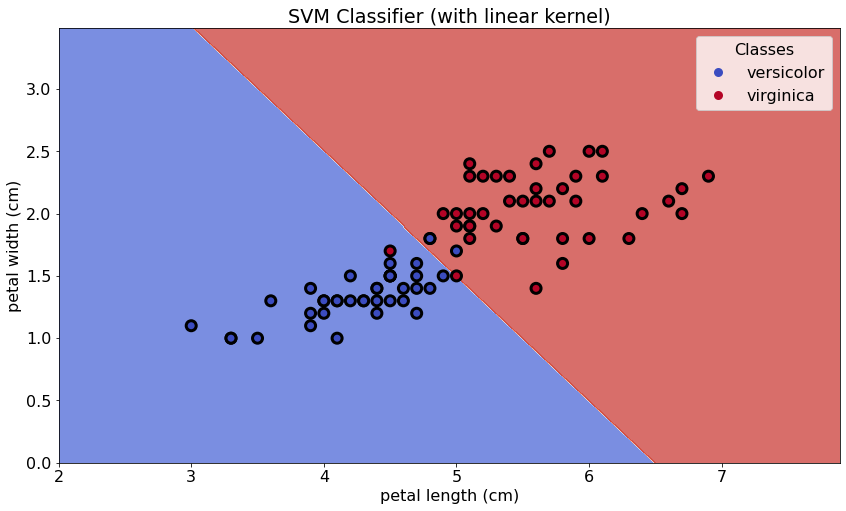

In [28]:
# plot to show classifier's decision boundary and training examples
title = 'SVM Classifier (with linear kernel)'

fig, ax = plt.subplots(figsize=(14,8))

X0, X1 = train_x[:, 0], train_x[:, 1]
xx, yy = plots.make_meshgrid(X0, X1, h=0.01)

plots.contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.75)

scatter = ax.scatter(X0, X1, c=train_y, cmap=plt.cm.coolwarm, s=100, linewidth=3, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel(features[feature1_idx])
ax.set_ylabel(features[feature2_idx])
ax.set_title(title)

handles, labels = scatter.legend_elements()
ax.legend(handles, sel_classes, loc="upper right", title="Classes")

plt.show()

## Now, let's evaluate our model

In [29]:
# make predictions on test set
pred_y = model.predict(test_x)

# are those prediction correct?
from sklearn import metrics

acc_score = metrics.accuracy_score(test_y, pred_y)
print('Model accuracy: {:.2f}%'.format(acc_score*100))

Model accuracy: 95.00%


### What about the training data?

In [30]:
# make predictions on *training* set
pred_y = model.predict(train_x)

acc_score = metrics.accuracy_score(train_y, pred_y)
print('Training accuracy: {:.2f}%'.format(acc_score*100))

Training accuracy: 96.25%


## Q: Is the model overfitted?